**Always good to do:**

Once in a while run in your prompt/command line/terminal:


```pip install --upgrade text-fabric```

This will update your TextFabric to the latest version.

# Building a VocabList
In this notebook we are going to build a VocabList that is sensitive to word frequencies. The following steps are involved:
1. Run a TF query.
2. Export the TF query.
3. Import the TF query into a `pandas` dataframe.
4. Substract the data we want for our VocabList.
5. Export our selected data as a spreadsheet.
6. Create a PDF from your spreadsheet so that it can be printed of and distributed among students.


# Getting the Data-Analysis workbench ready

## Getting the TF workbench ready
The first thing we need to do in our jupyter notebook is to
1. load the TF program
2. load the TF database

In [1]:
# First we load the TF program
from tf.fabric import Fabric
from tf.app import use

In [2]:
# Now we load the TF bhsa database
OT = use('etcbc/bhsa', version='2017', mod='CenterBLC/BHSaddons/tf')

In [3]:
# Now we load the TF tisch database
NT = use('CenterBLC/NA', version='1904')

The requested TF-app is not available offline
	~/text-fabric-data/github/CenterBLC/NA/app not found


The requested data is not available offline
	~/text-fabric-data/github/CenterBLC/NA/tf/1904 not found


## Loading data analysis tools

In [4]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure
from collections import Counter

# Creating a Greek Vocablist for students
We will run the same query on John 3 that we ran in our last Notebook and will use it to produce a VocabList for students.

## Searching for all words that appear leass than 10 times in John 3
We are looking for the following values necessary for creating a meaningful vocab list:
- the `bol_lemma_dict` so that we can show the dictionary form of the word we want to list.
- the `bol_gloss_EN`so that we get the English glosses for each Greek word.
- the `bol_lemma_occ` so that we can filter all words that appear less frequently than 10 times (<10).
- the `bol_dict_abc` so that we get the actual alphabetic order of each lemma we are collecting. This allows us for a nice filtering of words in their alphabetic order.

The reason why we are choosing for `bol_*` values has to do with the assumption that the list we generate will be used together with the [BibleOnlineLearner](https://bibleol.3bmoodle.dk/). All `bol_*` values appear as data features in BibleOnlineLearner.



In [5]:
VocabListJohn3 = '''
book book=John
    chapter chapter=3
        word bol_lemma_dict bol_lemma_occ<10 bol_dict_abc bol_gloss_EN

'''
VocabListJohn3  = NT.search(VocabListJohn3)
NT.table(VocabListJohn3, start=1, end=15, extraFeatures={}, condensed=False)

  0.22s 16 results


n,p,book,chapter,word
1,John 3:1,John,John 3,Νικόδημος
2,John 3:4,John,John 3,Νικόδημος
3,John 3:4,John,John 3,γέρων
4,John 3:8,John,John 3,"πνεῖ,"
5,John 3:9,John,John 3,Νικόδημος
6,John 3:12,John,John 3,ἐπίγεια
7,John 3:16,John,John 3,μονογενῆ
8,John 3:18,John,John 3,μονογενοῦς
9,John 3:20,John,John 3,φαῦλα
10,John 3:22,John,John 3,διέτριβεν


There is a total of 16 words in John 3 that appear less frequent than 10x. In order to produce a Vocab List we have to export our search results. How to do this, we will learn in one of our next notebooks... ;-)

## Creating a Vocab List

In [6]:
NT.export(VocabListJohn3, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data_creation', toFile='VocabListJohn3.tsv')

In [7]:
VocabListJohn3=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data_creation/VocabListJohn3.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListJohn3

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,chapter2,NODE3,TYPE3,TEXT3,bol_dict_abc3,bol_gloss_EN3,bol_lemma_dict3,bol_lemma_occ3
0,1,John,3,1,137783,book,John,137877,chapter,3,50297,word,Νικόδημος,3382,Nicodemus,"Νικόδημος, -ου, ὁ",5
1,2,John,3,4,137783,book,John,137877,chapter,3,50360,word,Νικόδημος,3382,Nicodemus,"Νικόδημος, -ου, ὁ",5
2,3,John,3,4,137783,book,John,137877,chapter,3,50365,word,γέρων,1079,old man,"γέρων, -οντος, ὁ",1
3,4,John,3,8,137783,book,John,137877,chapter,3,50429,word,"πνεῖ,",4000,blow,πνέω,7
4,5,John,3,9,137783,book,John,137877,chapter,3,50452,word,Νικόδημος,3382,Nicodemus,"Νικόδημος, -ου, ὁ",5
5,6,John,3,12,137783,book,John,137877,chapter,3,50495,word,ἐπίγεια,1909,earthly,"ἐπίγειος, -ον",7
6,7,John,3,16,137783,book,John,137877,chapter,3,50561,word,μονογενῆ,3294,"only, only-begotten, unique","μονογενής, -ές",9
7,8,John,3,18,137783,book,John,137877,chapter,3,50614,word,μονογενοῦς,3294,"only, only-begotten, unique","μονογενής, -ές",9
8,9,John,3,20,137783,book,John,137877,chapter,3,50649,word,φαῦλα,5155,"worthless, wicked, base","φαῦλος, -η, -ον",6
9,10,John,3,22,137783,book,John,137877,chapter,3,50700,word,διέτριβεν,1292,"tarry, continue, stay",διατρίβω,9


In [8]:
VocabListJohn3 = VocabListJohn3[['bol_lemma_dict3', 'bol_gloss_EN3', 'bol_dict_abc3', 'bol_lemma_occ3']]
VocabListJohn3

,bol_lemma_dict3,bol_gloss_EN3,bol_dict_abc3,bol_lemma_occ3
0,"Νικόδημος, -ου, ὁ",Nicodemus,3382,5
1,"Νικόδημος, -ου, ὁ",Nicodemus,3382,5
2,"γέρων, -οντος, ὁ",old man,1079,1
3,πνέω,blow,4000,7
4,"Νικόδημος, -ου, ὁ",Nicodemus,3382,5
5,"ἐπίγειος, -ον",earthly,1909,7
6,"μονογενής, -ές","only, only-begotten, unique",3294,9
7,"μονογενής, -ές","only, only-begotten, unique",3294,9
8,"φαῦλος, -η, -ον","worthless, wicked, base",5155,6
9,διατρίβω,"tarry, continue, stay",1292,9


As we can see, there are several words that appear more than one times in John 3. Lets remove these duplicates by using the function `drop.duplicates`. Also let us output the data in alphabetic order through the function `sort_values`.

In [9]:
VocabListJohn3Final = VocabListJohn3.drop_duplicates().sort_values(by='bol_dict_abc3', ascending=[True])
VocabListJohn3Final

,bol_lemma_dict3,bol_gloss_EN3,bol_dict_abc3,bol_lemma_occ3
10,"Αἰνών, ἡ",Aenon,137,1
2,"γέρων, -οντος, ὁ",old man,1079,1
9,διατρίβω,"tarry, continue, stay",1292,9
15,ἐλαττόω,"make less, make inferior",1629,3
5,"ἐπίγειος, -ον",earthly,1909,7
12,"ζήτησις, -εως, ἡ","question, debate, controversy",2200,7
13,"καθαρισμός, -οῦ, ὁ","cleansing, purifying, purification",2485,7
6,"μονογενής, -ές","only, only-begotten, unique",3294,9
0,"Νικόδημος, -ου, ὁ",Nicodemus,3382,5
14,"νύμφη, -ης, ἡ","bride, daughter-in-law",3416,8


## Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [10]:
VocabListJohn3Final.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data_creation/VocabListJohn3.xlsx')

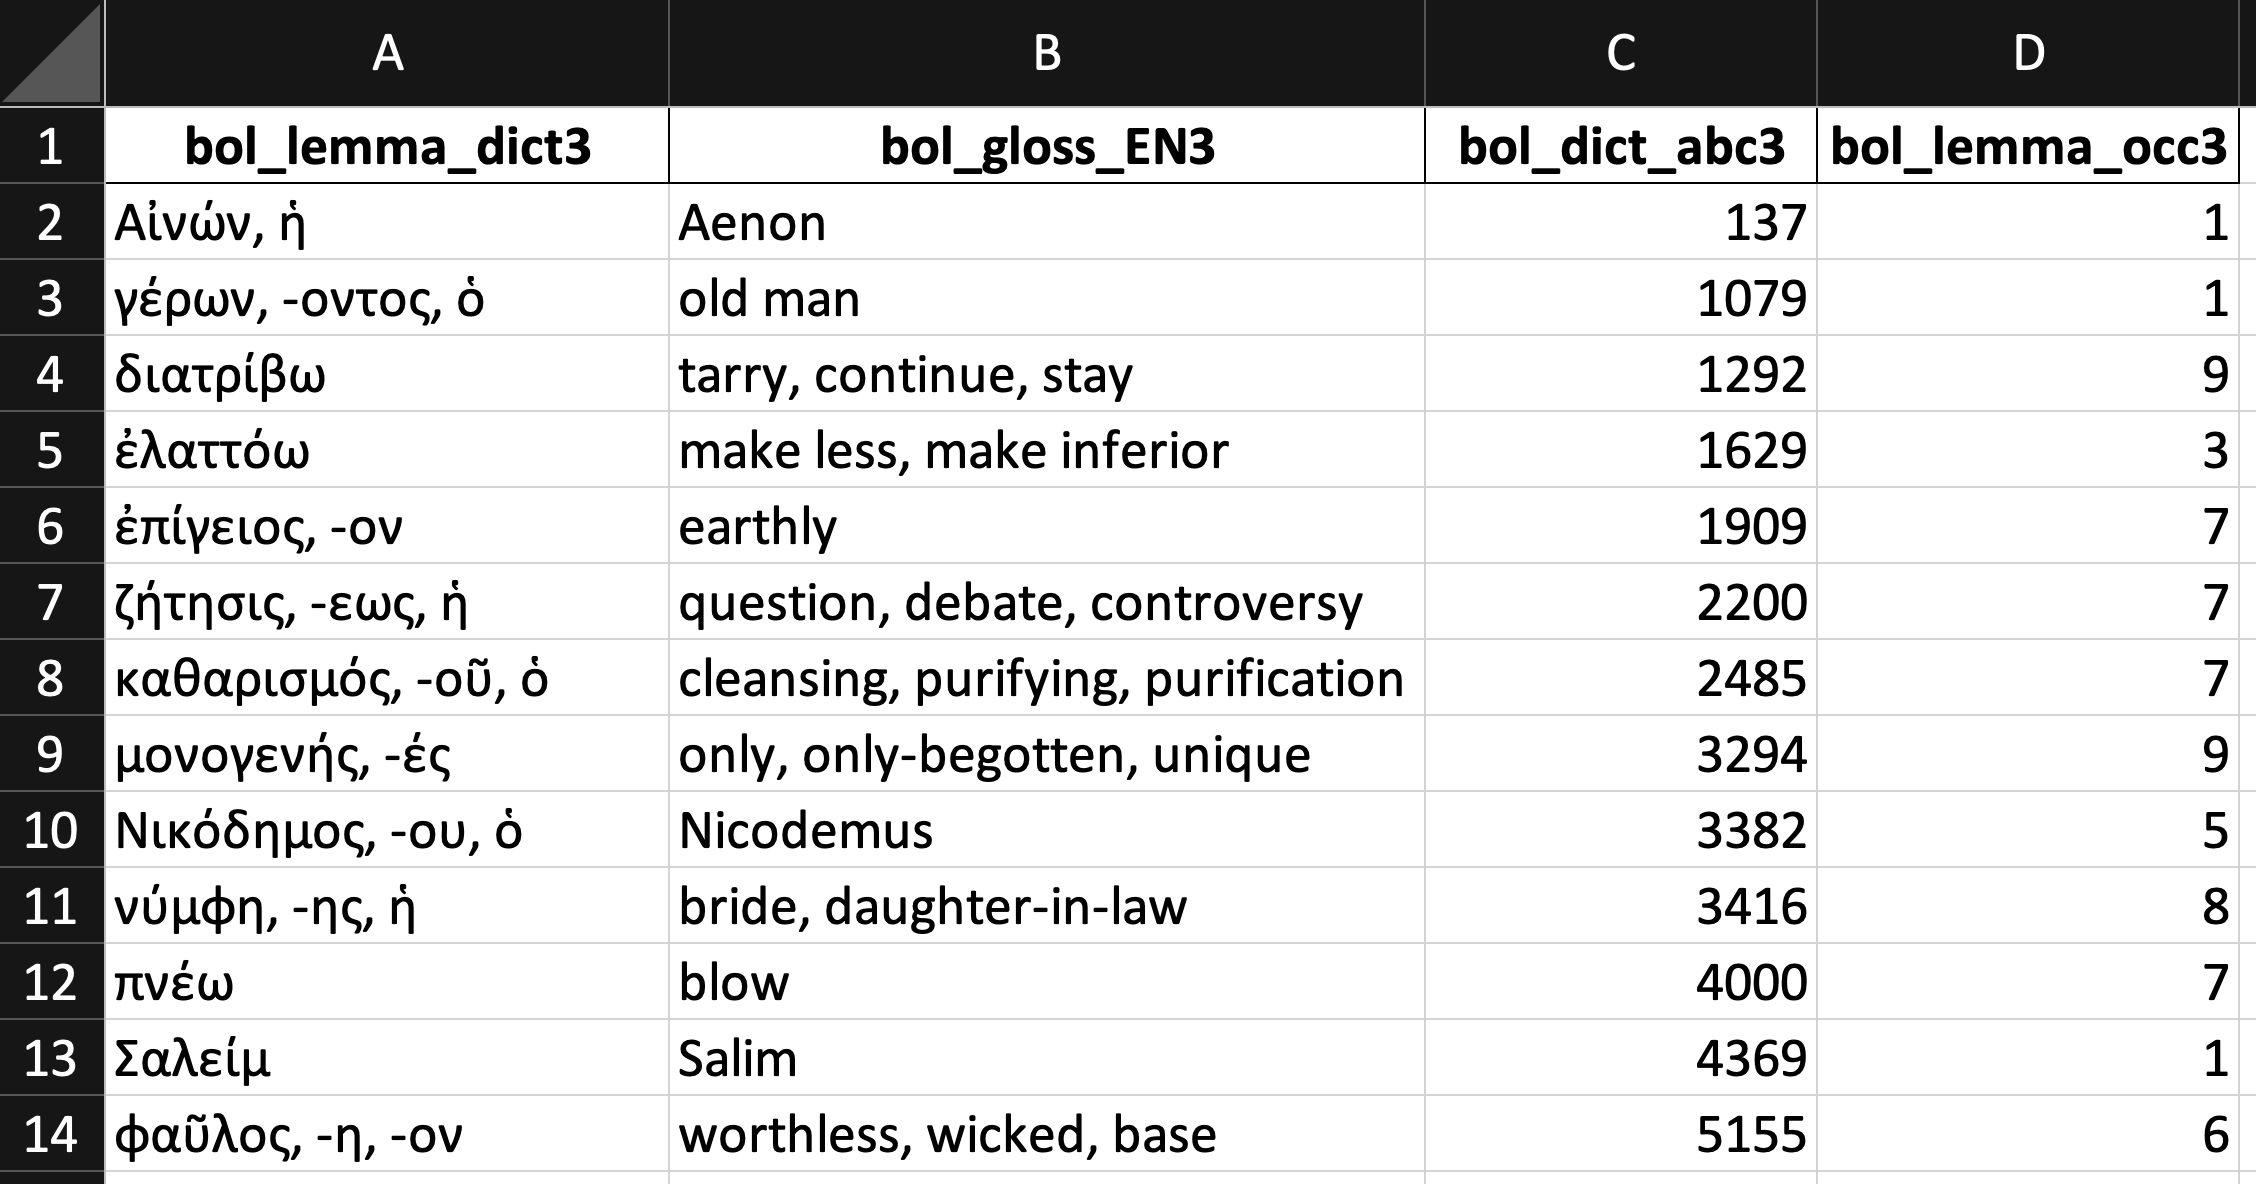

# Creating a Hebrew Vocablist for students
Lets assume you are preparing a Hebrew class in which you plan to translate Esther 6 and want your students to learn the words that appear less frequently than 100 times since your students know already all words that appear more frequently than 100 times.

## Searching for all words that appear less than 100 times in Esther 6

In [11]:
VocabListEsther6 = '''
book book=Esther
    chapter chapter=6
        word freq_lex<100 freq_occ* gloss* dict_bol_HebArm* dict_bol_EN* dict_bol_abc*
'''
VocabListEsther6  = OT.search(VocabListEsther6)
OT.table(VocabListEsther6, start=1, end=15, extraFeatures={'freq_lex', 'dict_bol_HebArm', 'dict_bol_EN', 'dict_bol_abc','gloss'}, condensed=False)

  1.08s 74 results


n,p,book,chapter,word
1,Esther 6:1,Esther,Esther 6,נָדְדָ֖ה
2,Esther 6:1,Esther,Esther 6,שְׁנַ֣ת
3,Esther 6:1,Esther,Esther 6,זִּכְרֹנֹות֙
4,Esther 6:2,Esther,Esther 6,מָרְדֳּכַ֜י
5,Esther 6:2,Esther,Esther 6,בִּגְתָ֣נָא
6,Esther 6:2,Esther,Esther 6,תֶ֗רֶשׁ
7,Esther 6:2,Esther,Esther 6,סָרִיסֵ֣י
8,Esther 6:2,Esther,Esther 6,סַּ֑ף
9,Esther 6:2,Esther,Esther 6,אֲחַשְׁוֵרֹֽושׁ׃
10,Esther 6:3,Esther,Esther 6,יְקָ֧ר


### Creating a Vocab List
Now we have found all the words we are looking for and will export that list into a TSV files so that we can futher process it.

In [12]:
OT.export(VocabListEsther6, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export', toFile='VocabListEsther6.tsv')

Lets now import the TSV file as a dataframe so that we can cleanup the data for our vocab list.

In [13]:
VocabListEsther6=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/VocabListEsther6.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListEsther6

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,chapter2,NODE3,TYPE3,TEXT3,dict_bol_EN3,dict_bol_HebArm3,dict_bol_abc3,freq_lex3,freq_occ3,gloss3
0,1,Esther,6,1,426618,book,Esther,427448,chapter,6,367938,word,נָדְדָ֖ה,"qal: run away, flee; wander; flutter (wings); ...",נדד,4947,27,2,NaN
1,2,Esther,6,1,426618,book,Esther,427448,chapter,6,367939,word,שְׁנַ֣ת,sleep,שֵׁנָה II,8003,23,125,NaN
2,3,Esther,6,1,426618,book,Esther,427448,chapter,6,367949,word,זִּכְרֹנֹות֙,reminder,זִכָּרֹון,2044,24,1,NaN
3,4,Esther,6,2,426618,book,Esther,427448,chapter,6,367965,word,מָרְדֳּכַ֜י,Mordecai,מָרְדְּכַי,4655,60,60,NaN
4,5,Esther,6,2,426618,book,Esther,427448,chapter,6,367967,word,בִּגְתָ֣נָא,Bigthana,בִּגְתָן,860,2,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,70,Esther,6,14,426618,book,Esther,427448,chapter,6,368315,word,סָרִיסֵ֥י,"court-official, eunuch",סָרִיס,5493,45,5,NaN
70,71,Esther,6,14,426618,book,Esther,427448,chapter,6,368320,word,יַּבְהִ֨לוּ֙,ni: be terrified; pi: terrify; hasten; be in h...,בהל,881,39,3,NaN
71,72,Esther,6,14,426618,book,Esther,427448,chapter,6,368324,word,הָמָ֔ן,Haman,הָמָן II,1901,54,54,NaN
72,73,Esther,6,14,426618,book,Esther,427448,chapter,6,368327,word,מִּשְׁתֶּ֖ה,(drinking-) feast,מִשְׁתֶּה,4843,46,40,NaN


Lets reduce the data to the actual information we are interested for our vocab list.

In [14]:
VocabListEsther6 = VocabListEsther6[['dict_bol_HebArm3', 'dict_bol_EN3', 'freq_lex3', 'dict_bol_abc3']]
VocabListEsther6.head(15)

,dict_bol_HebArm3,dict_bol_EN3,freq_lex3,dict_bol_abc3
0,נדד,"qal: run away, flee; wander; flutter (wings); ...",27,4947
1,שֵׁנָה II,sleep,23,8003
2,זִכָּרֹון,reminder,24,2044
3,מָרְדְּכַי,Mordecai,60,4655
4,בִּגְתָן,Bigthana,2,860
5,תֶּרֶשׁ,Teresh,2,8511
6,סָרִיס,"court-official, eunuch",45,5493
7,סַף II,threshold,25,5452
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
9,יְקָר II,"preciousness; honoring, esteeming",17,3249


We see several duplicates that we want to drop. We also want to sort our word list according to the alphabetic order.

In [15]:
VocabListEsther6Final = VocabListEsther6.drop_duplicates().sort_values('dict_bol_abc3', ascending=[True])
VocabListEsther6Final

,dict_bol_HebArm3,dict_bol_EN3,freq_lex3,dict_bol_abc3
61,אָבֵל IV,in mourning,8,55
8,אֲחַשְׁוֵרֹושׁ,Xerxes,31,311
73,אֶסְתֵּר,Esther,55,610
4,בִּגְתָן,Bigthana,2,860
70,בהל,ni: be terrified; pi: terrify; hasten; be in h...,39,881
10,גְּדוּלָּה,greatness,12,1345
60,דחף,"qal: hasten; ni: hasten onseself, hurry;",4,1683
13,הָמָן II,Haman,54,1901
2,זִכָּרֹון,reminder,24,2044
64,זֶרֶשׁ,Zeresh,4,2135


### Exporting our List and Post-Production
Now we can export this result into spreadsheet file and print it of for our students.

In [16]:
VocabListEsther6Final.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/VocabListEsther6Final.xlsx')

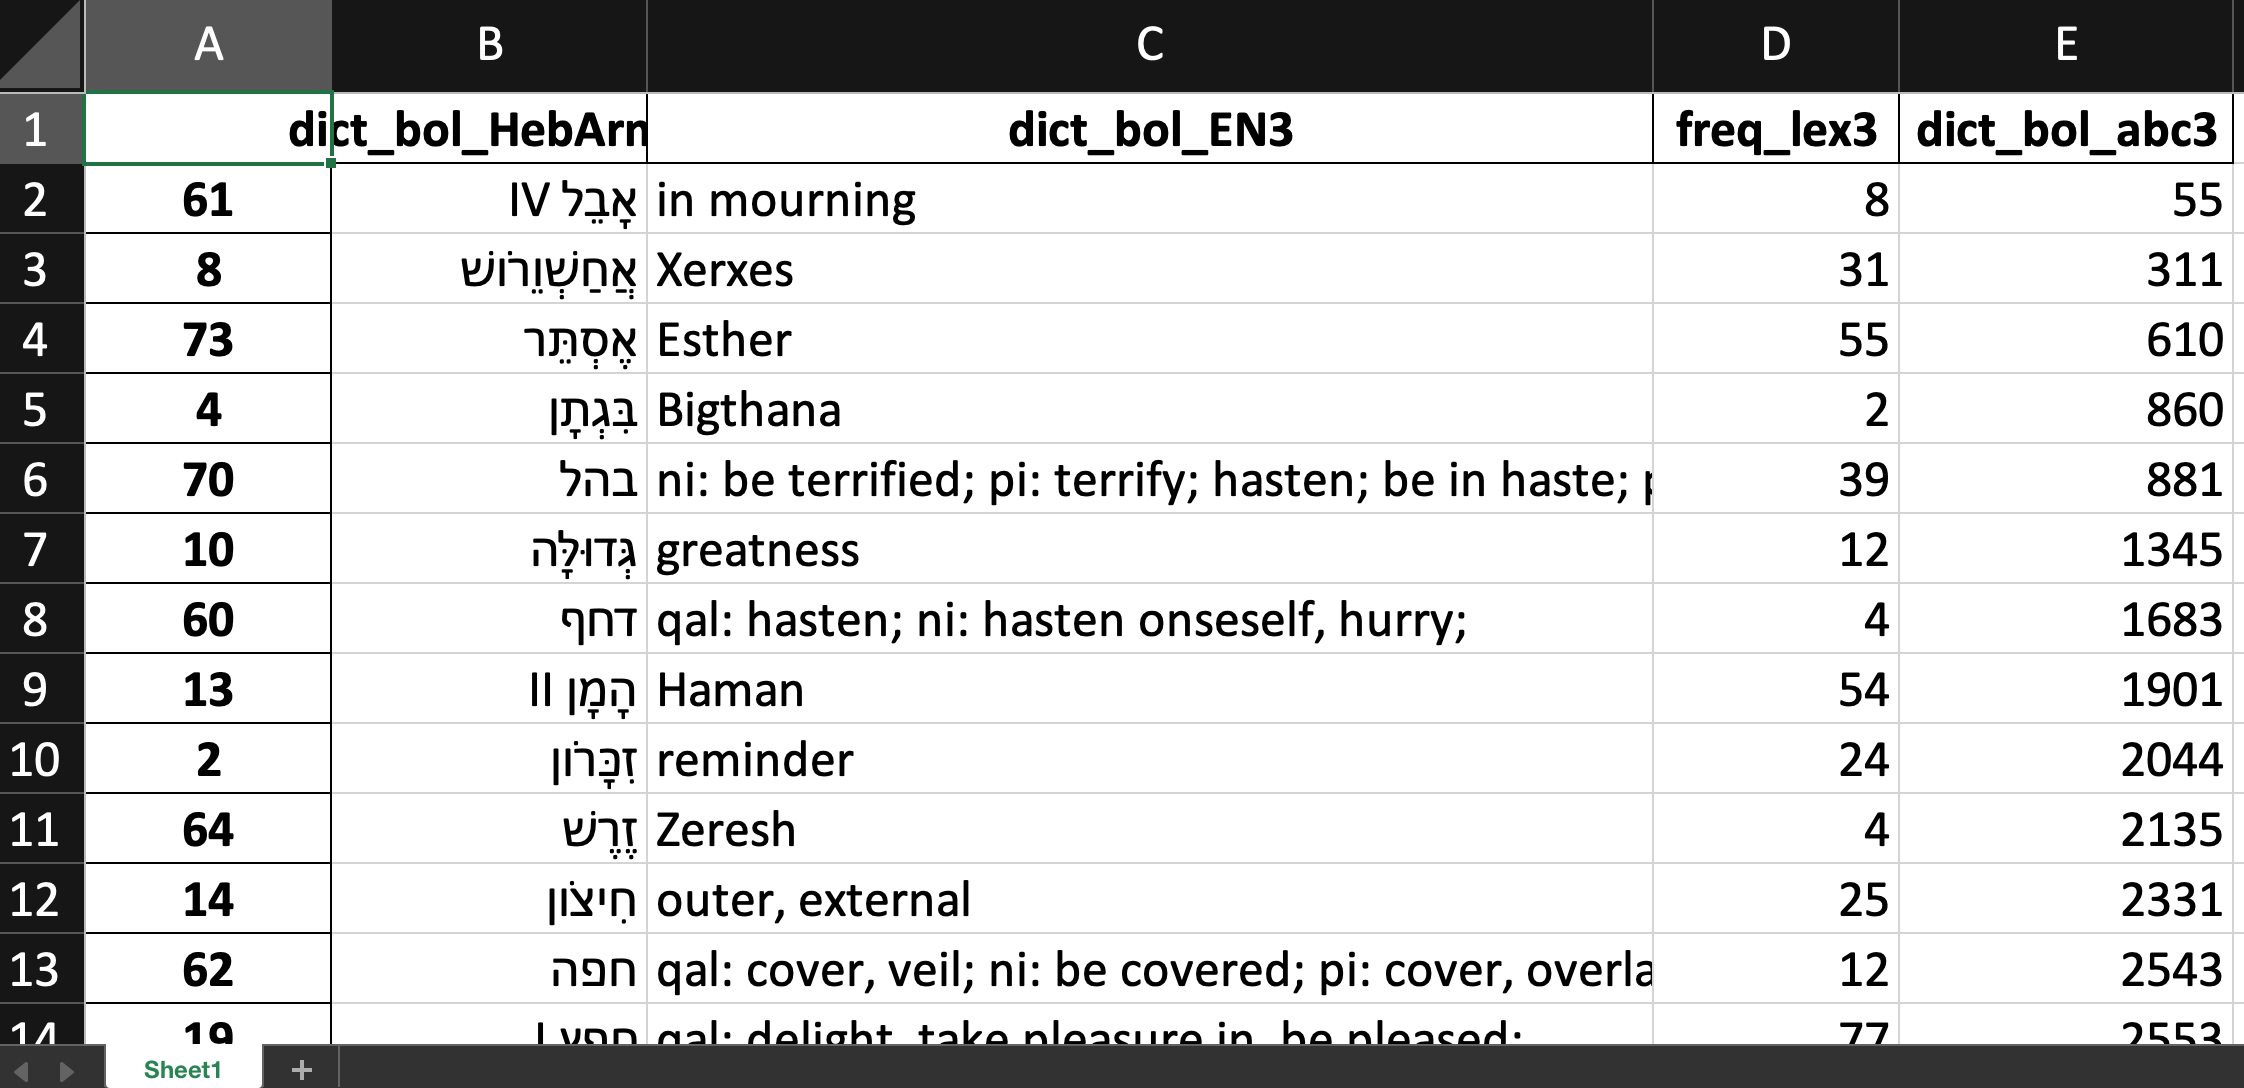

## Building a vocab list for the book of Jona

In [17]:
VocabListJona = '''
book book=Jona
        word freq_lex* dict_bol_HebArm* dict_bol_EN* dict_bol_abc* lex*
'''
VocabListJona  = OT.search(VocabListJona)
OT.table(VocabListJona, start=1, end=15, extraFeatures={'freq_lex', 'dict_bol_HebArm', 'dict_bol_EN', 'dict_bol_abc','gloss'}, condensed=False)

  0.97s 985 results


n,p,book,word
1,Jonah 1:1,Jonah,וַֽ
2,Jonah 1:1,Jonah,יְהִי֙
3,Jonah 1:1,Jonah,דְּבַר־
4,Jonah 1:1,Jonah,יְהוָ֔ה
5,Jonah 1:1,Jonah,אֶל־
6,Jonah 1:1,Jonah,יֹונָ֥ה
7,Jonah 1:1,Jonah,בֶן־
8,Jonah 1:1,Jonah,אֲמִתַּ֖י
9,Jonah 1:1,Jonah,לֵ
10,Jonah 1:1,Jonah,אמֹֽר׃


In [18]:
OT.export(VocabListJona, toDir='/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export', toFile='VocabListJona.tsv')

In [19]:
VocabListJona=pd.read_csv('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/VocabListJona.tsv',delimiter='\t',encoding='utf-16')
pd.set_option('display.max_columns', 50)
VocabListJona.head(25)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,dict_bol_EN2,dict_bol_HebArm2,dict_bol_abc2,freq_lex2,lex2
0,1,Jonah,1,1,426603,book,Jona,298555,word,וַֽ,"and; also, even (conj); but",וְ,1953,50272,W
1,2,Jonah,1,1,426603,book,Jona,298556,word,יְהִי֙,"qal: be, happen, become, occur; ni: be realize...",היה,1865,3561,HJH[
2,3,Jonah,1,1,426603,book,Jona,298557,word,דְּבַר־,"word; thing, matter; deed",דָּבָר I,1616,1441,DBR/
3,4,Jonah,1,1,426603,book,Jona,298558,word,יְהוָ֔ה,"YHWH, LORD",יְהוָה,2965,6828,JHWH/
4,5,Jonah,1,1,426603,book,Jona,298559,word,אֶל־,"toward (prep), unto; towards",אֶל I,392,5517,>L
5,6,Jonah,1,1,426603,book,Jona,298560,word,יֹונָ֥ה,Jonah,יֹונָה II,3016,19,JWNH=/
6,7,Jonah,1,1,426603,book,Jona,298561,word,בֶן־,son,בֵּן I,1066,4937,BN/
7,8,Jonah,1,1,426603,book,Jona,298562,word,אֲמִתַּ֖י,Amittai,אֲמִתַּי,558,2,>MTJ/
8,9,Jonah,1,1,426603,book,Jona,298563,word,לֵ,"to, toward (prep); Do, Yes, (voc); in regard t...",לְ,3682,20069,L
9,10,Jonah,1,1,426603,book,Jona,298564,word,אמֹֽר׃,"qal: say, think; ni: be said, be called; hi: d...",אמר I,548,5307,>MR[


### Lets get the information we want

In [20]:
VocabListJona = VocabListJona[['S1','S2','S3', 'dict_bol_HebArm2', 'dict_bol_EN2', 'dict_bol_abc2', 'freq_lex2',]]
VocabListJona

,S1,S2,S3,dict_bol_HebArm2,dict_bol_EN2,dict_bol_abc2,freq_lex2
0,Jonah,1,1,וְ,"and; also, even (conj); but",1953,50272
1,Jonah,1,1,היה,"qal: be, happen, become, occur; ni: be realize...",1865,3561
2,Jonah,1,1,דָּבָר I,"word; thing, matter; deed",1616,1441
3,Jonah,1,1,יְהוָה,"YHWH, LORD",2965,6828
4,Jonah,1,1,אֶל I,"toward (prep), unto; towards",392,5517
...,...,...,...,...,...,...,...
980,Jonah,4,11,לְ,"to, toward (prep); Do, Yes, (voc); in regard t...",3682,20069
981,Jonah,4,11,שְׂמֹאל,left (side); left hand,7907,54
982,Jonah,4,11,וְ,"and; also, even (conj); but",1953,50272
983,Jonah,4,11,בְּהֵמָה,animals; cattle,883,190


### Lets rename columns

In [21]:
VocabListJona.rename(columns={'S1':'book','S2':'chapter','S3':'verse', 'dict_bol_HebArm2':'dictionary form', 'dict_bol_EN2':'English translation', 'dict_bol_abc2':'alphabetic order', 'freq_lex2':'word frequency',}, inplace=True)
VocabListJona

,book,chapter,verse,dictionary form,English translation,alphabetic order,word frequency
0,Jonah,1,1,וְ,"and; also, even (conj); but",1953,50272
1,Jonah,1,1,היה,"qal: be, happen, become, occur; ni: be realize...",1865,3561
2,Jonah,1,1,דָּבָר I,"word; thing, matter; deed",1616,1441
3,Jonah,1,1,יְהוָה,"YHWH, LORD",2965,6828
4,Jonah,1,1,אֶל I,"toward (prep), unto; towards",392,5517
...,...,...,...,...,...,...,...
980,Jonah,4,11,לְ,"to, toward (prep); Do, Yes, (voc); in regard t...",3682,20069
981,Jonah,4,11,שְׂמֹאל,left (side); left hand,7907,54
982,Jonah,4,11,וְ,"and; also, even (conj); but",1953,50272
983,Jonah,4,11,בְּהֵמָה,animals; cattle,883,190


### Dropping duplicates
Now we need to make sure that all duplicate entries are being removed. We do not want a student to learn W four times ;-)

https://www.interviewqs.com/ddi-code-snippets/drop-duplicate-rows-pandas
https://www.journaldev.com/33488/pandas-drop-duplicate-rows-drop_duplicates-function

So we want to delete all rows in which a lexeme appears that has already appeared earlier. In addition, we want to always make sure that the first appearance of a lexeme is kept!:

```python
VocabListJona.drop_duplicates(subset='dictionary form', keep="first")

```




In [22]:
VocabListJona = VocabListJona.drop_duplicates(subset=['dictionary form'], keep="first")
VocabListJona

,book,chapter,verse,dictionary form,English translation,alphabetic order,word frequency
0,Jonah,1,1,וְ,"and; also, even (conj); but",1953,50272
1,Jonah,1,1,היה,"qal: be, happen, become, occur; ni: be realize...",1865,3561
2,Jonah,1,1,דָּבָר I,"word; thing, matter; deed",1616,1441
3,Jonah,1,1,יְהוָה,"YHWH, LORD",2965,6828
4,Jonah,1,1,אֶל I,"toward (prep), unto; towards",392,5517
...,...,...,...,...,...,...,...
972,Jonah,4,11,עֶשְׂרֵה I,ten,6119,134
973,Jonah,4,11,רִבֹּוא,"ten thousand, countless",7132,10
978,Jonah,4,11,בַּיִן,between (prep); interval (n),950,407
979,Jonah,4,11,יָמִין I,"south; right hand, right side",3115,139


### Export!
Now we have what we want and can export the files.

In [23]:
VocabListJona.to_excel('/Users/oliverglanz/Library/CloudStorage/OneDrive-AndrewsUniversity/1200_AUS-research/Fabric-TEXT/course_PhD-workshop/data-export/VocabListJona.xlsx')

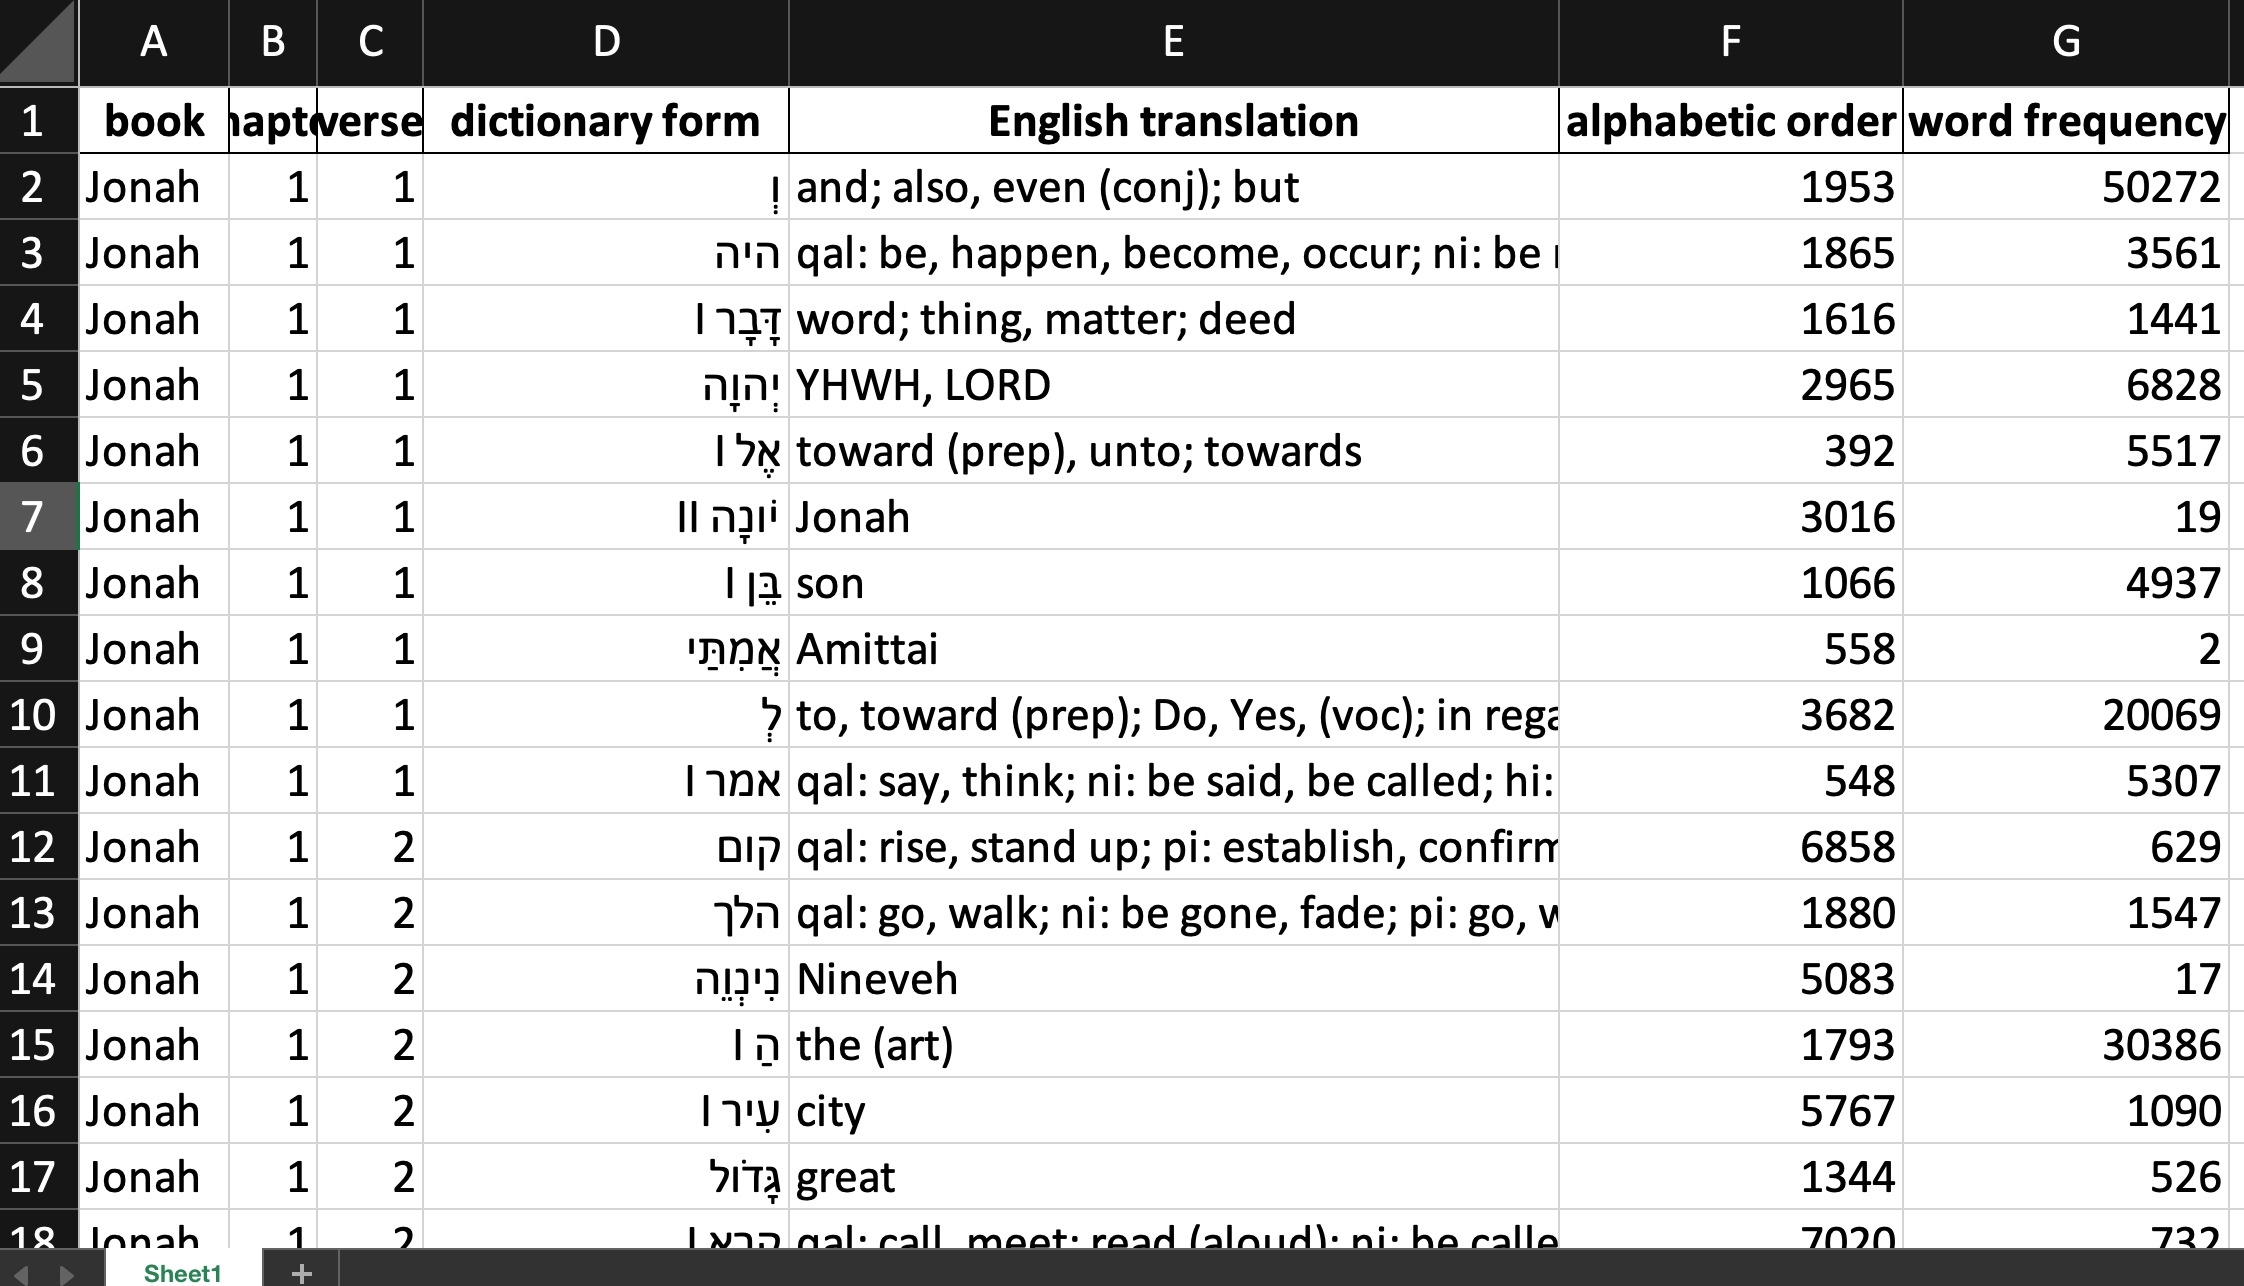

# Assignments
Create your own Vocab List on a passage you select.

# Whats Next?: Complex Query building
1. We will learn the basic architecture of the BHS and the Tischendorf database.
2. Understanding the database better will allow us to build sophisticated queries, including syntax queries...